# Cheatcode to Exploratory Data Analysis (EDA)

It is an approach to analyzing and visualizing data sets to summarize their main characteristics, often with the help of statistical graphics and other data visualization methods. The primary goal of EDA is to uncover patterns, relationships, anomalies, and trends in the data, providing insights that can guide further analysis or decision-making processes.

Types of Exploratory Data Analysis

-- There are three main types of EDA:

* Univariate 
* Bivariate 
* Multivariate 

## **Step 1: Understand the Data**

* Familiarize yourself with the dataset, including the number of records, columns, and data types.
* Identify the target variable (if applicable) and understand its significance.

### Importing Libraries

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("product_data.csv")

## 1. Data Size:

Question: How big is the data?

Approach: Check the shape of the dataset.

-- `shape` returns the number of rows and columns.

In [3]:
data.shape

(60, 10)

## 2. Data Preview:

Question: What does the data look like?

Approach: Look at the first few rows of the dataset using head() or sample().

-- `head()` displays the first few rows of the dataset.

-- `sample()` displays the randomly selected items rows of the dataset.

In [4]:
data.head(5)

,ProductID,ProductName,Category,Price,CustomerRating,PromotionType,CustomerAge,ShippingTime,CustomerSatisfaction,ShippingDate
0,1,Smartphone X,Electronics,500,4.2,Discount,Young,2,4,02/15/2022
1,2,Fashion Jacket,Clothing,80,4.5,Bundle Offer,Adult,3,5,08/20/2021
2,3,Kitchen Blender,Home & Kitchen,120,3.8,None,Senior,4,3,05/10/2022
3,4,Running Shoes,Sports,60,4.0,Discount,Young,2,4,11/03/2022
4,5,LED TV,Electronics,700,4.3,None,Adult,3,4,06/27/2021


In [5]:
data.sample(5)

,ProductID,ProductName,Category,Price,CustomerRating,PromotionType,CustomerAge,ShippingTime,CustomerSatisfaction,ShippingDate
0,1,Smartphone X,Electronics,500,4.2,Discount,Young,2,4,02/15/2022
8,9,Sneakers,Sports,40,3.9,Discount,Adult,3,3,12/18/2021
28,29,Desk Lamp,Home & Kitchen,25,4.0,None,Young,2,4,05/19/2022
11,12,Yoga Mat,Sports,20,4.2,None,Adult,3,4,06/15/2021
53,224,Sleeping Bag,Outdoor & Recreation,40,4.5,None,Senior,4,4,02/21/2022


## 3. Data Types:

Question: What types of information are stored in each column?

Approach: Check the data types of each column using dtypes or info().

-- `info()` provides information about the dataset, including memory usage.

-- `dtypes` returns the data types of each column.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             60 non-null     int64  
 1   ProductName           60 non-null     object 
 2   Category              60 non-null     object 
 3   Price                 60 non-null     int64  
 4   CustomerRating        60 non-null     float64
 5   PromotionType         60 non-null     object 
 6   CustomerAge           60 non-null     object 
 7   ShippingTime          60 non-null     int64  
 8   CustomerSatisfaction  60 non-null     int64  
 9   ShippingDate          60 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.8+ KB


In [7]:
data.dtypes

ProductID                 int64
ProductName              object
Category                 object
Price                     int64
CustomerRating          float64
PromotionType            object
CustomerAge              object
ShippingTime              int64
CustomerSatisfaction      int64
ShippingDate             object
dtype: object

## 4. Missing Values:

Question: Are there any null or missing values in the data?

Approach: Check for the presence of missing values using isnull() or isna().


-- `isnull().sum()` or `isna().sum()` gives the total number of missing values per column.

-- `isnull().mean() * 100` provides the percentage of missing values.

In [8]:
data.isna().sum()

ProductID               0
ProductName             0
Category                0
Price                   0
CustomerRating          0
PromotionType           0
CustomerAge             0
ShippingTime            0
CustomerSatisfaction    0
ShippingDate            0
dtype: int64

In [9]:
data.isnull().mean() * 100

ProductID               0.0
ProductName             0.0
Category                0.0
Price                   0.0
CustomerRating          0.0
PromotionType           0.0
CustomerAge             0.0
ShippingTime            0.0
CustomerSatisfaction    0.0
ShippingDate            0.0
dtype: float64

## 5. Statistical Overview:

Question: How is the data distributed statistically?

Approach: Obtain statistical measures using describe().

-- `describe()` gives statistical measures for numerical columns.

In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ProductID,60.0,115.500000,101.220936,1.0,15.75,115.5,215.25,230.0
Price,60.0,69.383333,110.925550,8.0,23.75,40.0,70.00,700.0
CustomerRating,60.0,4.106667,0.277926,3.5,3.90,4.1,4.30,4.6
ShippingTime,60.0,2.966667,0.822701,2.0,2.00,3.0,4.00,4.0
CustomerSatisfaction,60.0,3.600000,0.994902,2.0,3.00,4.0,4.00,5.0


-- `Central Tendency`: This term refers to values located at the data's central position or middle zone. 

The three generally estimated parameters of central tendency are mean, median, and mode. 

-- Mean is the average of all values in data.

-- While the mode is the value that occurs the maximum number of times. 

-- The Median is the middle value with equal observations to its left and right. 

In [27]:
data["CustomerSatisfaction"].skew()

-0.28629649843102617

## 6. Duplicate Data:

Question: Are there duplicate values?

Approach: Identify and remove duplicates using duplicated().

-- `duplicated().sum()` counts the number of duplicate rows.

-- `drop_duplicates()` removes duplicate rows.

In [11]:
print("Total duplicate values are '", data.duplicated().sum(), "'.")

Total duplicate values are ' 0 '.


## 7. Correlation Analysis:

Question: How are different columns related to each other?

Approach: Examine the correlation matrix and visualize it if needed.

-- `corr()` calculates the correlation matrix.

-- `heatmap()` visualizes the correlation matrix.

In [12]:
data.corr()

,ProductID,Price,CustomerRating,ShippingTime,CustomerSatisfaction
ProductID,1.000000,-0.288716,-0.039644,0.047830,-0.213747
Price,-0.288716,1.000000,0.235056,-0.040903,0.264957
CustomerRating,-0.039644,0.235056,1.000000,-0.065726,0.818926
ShippingTime,0.047830,-0.040903,-0.065726,1.000000,-0.223640
CustomerSatisfaction,-0.213747,0.264957,0.818926,-0.223640,1.000000


## 8. Exploring Diversity:

Question: How many unique values are there in a specific column?
Approach: Use the nunique() method to find the number of unique values in a particular column.

-- `nunique()` method returns the number of unique values for each column.

In [13]:
data["ProductName"].nunique()

# Note: Understand the diversity and variety within a categorical column. Higher unique values may indicate a more diverse range of categories.

60

# **Step 2: Univariate Graphical Analysis**

* It refers to the examination and exploration of a single variable in a dataset. 
* It involves generating summary statistics, visualizations (e.g., histograms, box plots), and understanding the distribution and characteristics of that specific variable.

### 1. Categorical Data

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## a. Countplot

-- Purpose: Count occurrences of each category in a categorical variable.

-- Usage: `sns.countplot(x='category_column', data=data)`

In [15]:
data["Category"].nunique()

12

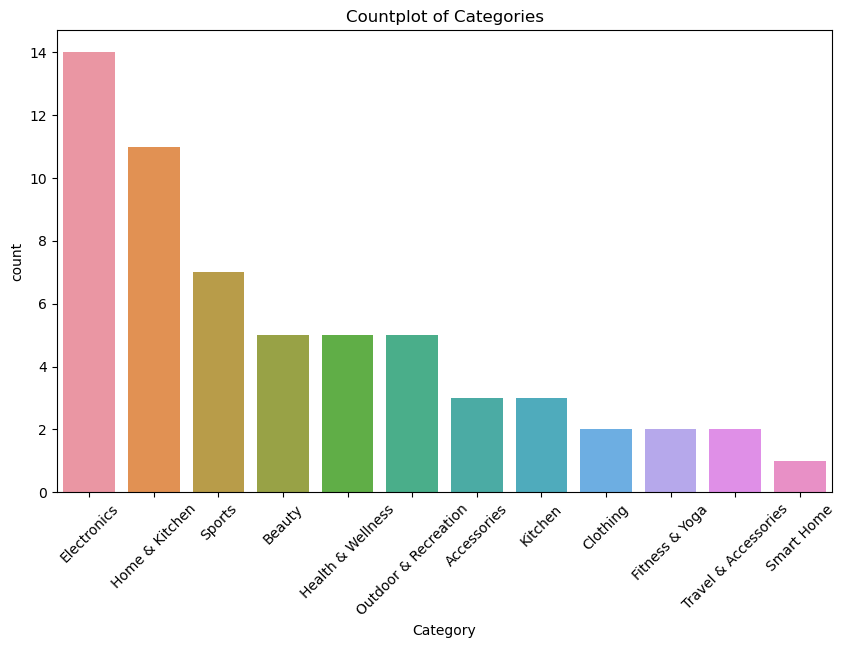

In [16]:
# Using a countplot to understand the "Category"
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Category", order=data["Category"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Countplot of Categories")
plt.show()

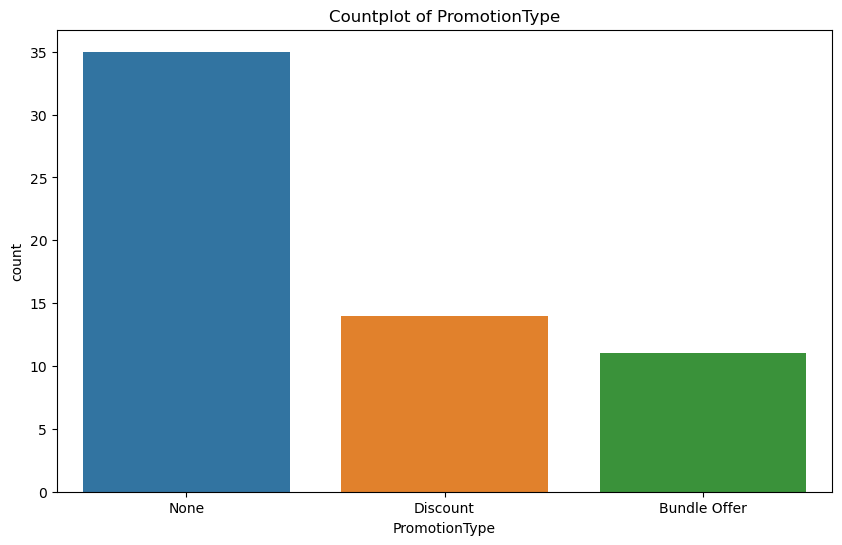

In [17]:
# Using a countplot to understand the "PromotionType"
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="PromotionType", order=data["PromotionType"].value_counts().index)
plt.title("Countplot of PromotionType")
plt.show()

*Note : It is used to show the counts of observations in each categorical bin using bars and easily compare the frequency of different categories within a single variable.*

## b. PieChart

-- Purpose: Display the proportion of each category in a categorical variable.

-- Usage: `plt.pie(data['category_column'].value_counts(), labels=data['category_column'].value_counts().index)`

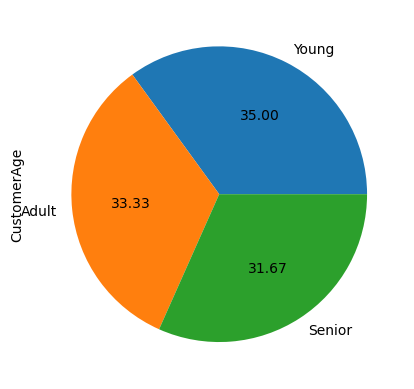

In [20]:
# Using a piechart to understand the "CustomerAge"
data["CustomerAge"].value_counts().plot(kind="pie", autopct = "%.2f")
plt.show()

*Note: A piechart provide a visual representation of how individual categories contribute to the total, to visualize the percentage of the data belonging to each category.*

### 2. Numerical Data

## a. Histogram

Histograms, a bar plot in which each bar represents the frequency (count) or proportion (count/total count) of cases for a range of values.

-- Purpose: Display distribution of a single numerical variable.

-- Usage: `plt.hist(data['column'])`

(array([ 2.,  4.,  6.,  5., 10.,  6.,  9.,  5.,  4.,  9.]),
 array([3.5 , 3.61, 3.72, 3.83, 3.94, 4.05, 4.16, 4.27, 4.38, 4.49, 4.6 ]),
 <BarContainer object of 10 artists>)

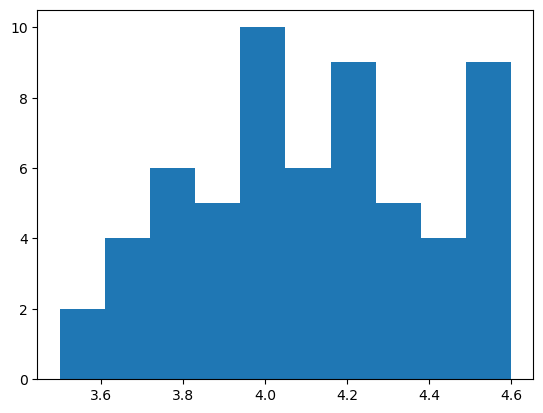

In [22]:
# Using a histplot to understand the "CustomerRating"
plt.hist(data["CustomerRating"])

*Note: Understand the overall shape of the data distribution, including any skewness, peaks, or gaps in the values.*

## b. Distplot

-- Purpose: Visualize distribution of a numerical column.

-- Usage: `sns.distplot(data['NumericalColumn'])`

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ShippingTime', ylabel='Density'>

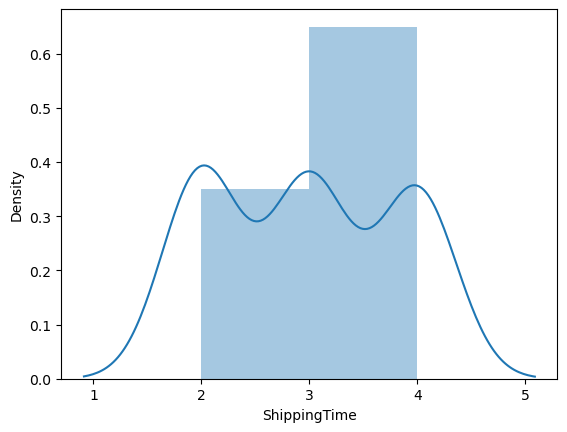

In [25]:
# Using a distplot to understand the "ShippingTime"
sns.distplot(data["ShippingTime"])

*Note: It is beneficial for understanding the shape of the distribution/density, identifying outliers, and assessing the overall pattern of numerical data.*

## c. Box Plot (Box-and-Whisker Plots)

Box plots, which graphically depict the five-number summary of minimum, first quartile, median, third quartile, and maximum.

-- Purpose: Show summary statistics and identify outliers in numerical data.

-- Usage: `sns.boxplot(x='column', data=data)`

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CustomerRating'>

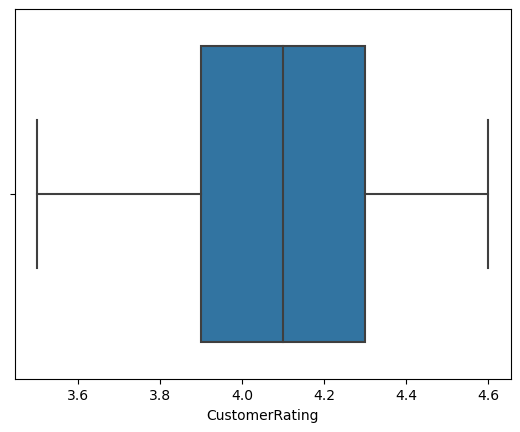

In [37]:
# Using a boxplot to understand the "CustomerRating"
sns.boxplot(data["CustomerRating"])

*Note: Visualize the distribution and central tendency of numerical data across different categories. To identify variations, outliers, and the overall spread of numerical values within distinct categorical groups.*

# **Step 3: Bi/Multi-variate Graphical Analysis**


Bivariate graphical analysis involves examining the relationship between two variables through visual representation. 
Multivariate Analysis is an extension of bivariate analysis which means it involves multiple variables at the same time to find correlation between them.

The main three types we will see here are:

* Numerical V/s Numerical
* Categorical v/s Numerical 
* Categorical V/s Categorical data

In [33]:
tips_data = sns.load_dataset('tips')

In [63]:
tips_data.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [73]:
tips_data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## *I. Visualizing (Numerical - Numerical) Columns*

## 1. Scatterplot 

-- Purpose: Explore relationship between two numerical variables.

-- Usage: `plt.scatter(data['x_column'], data['y_column'])`

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


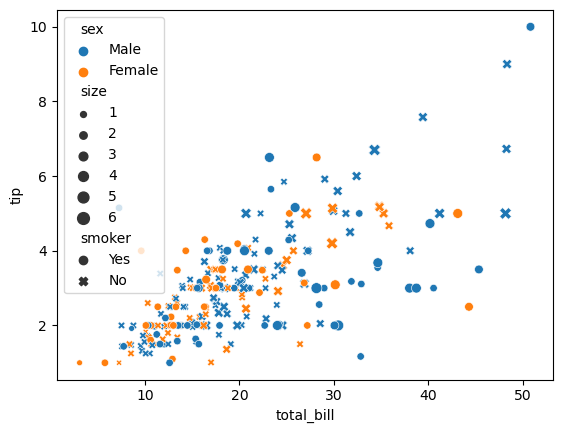

In [35]:
# Using a scatterplot to check the correlation between "total_bill, "tip", "sex, "smoker and "sex"
sns.scatterplot(tips_data['total_bill'],tips_data['tip'],hue=tips_data['sex'],style=tips_data['smoker'],size=tips_data['size'])
xlabel='total_bill', 
ylabel='tip'

*Note: Identify patterns, trends, or correlations between the plotted points, revealing insights into the association between the variables.*

## 2. Lineplot 

-- Purpose: Display relationship between two continuous variables.

-- Usage: `sns.lineplot(x='Variable1', y='Variable2', data=data)`


c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill', ylabel='size'>

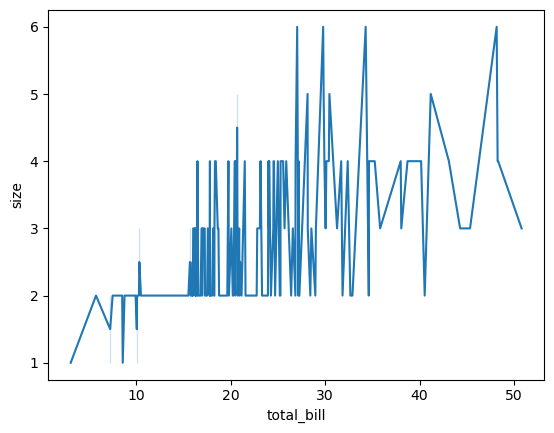

In [75]:
# Using a lineplot to check the relation between "total_bill" and "size"
sns.lineplot(tips_data['total_bill'],tips_data['size'])


 *Note: It is commonly used for time-series data or any data where there is a meaningful order. It allows you to observe trends, patterns, or variations in the data.*

## *II. Visualizing (Numerical - Categorical) Columns*

## 1. Bar Plot 

-- Purpose: Visualize the distribution of categorical variables.

-- Usage: `plt.bar(data['category_column'].value_counts().index, data['category_column'].value_counts())`

In [36]:
data.columns

Index(['ProductID', 'ProductName', 'Category', 'Price', 'CustomerRating',
       'PromotionType', 'CustomerAge', 'ShippingTime', 'CustomerSatisfaction',
       'ShippingDate'],
      dtype='object')

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CustomerRating', ylabel='CustomerSatisfaction'>

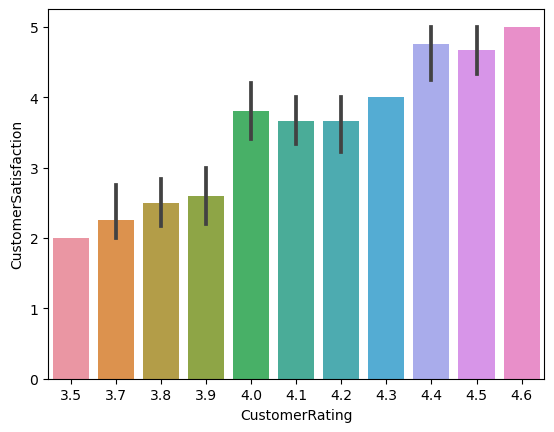

In [40]:
# Using a barplot to check the correlation between "CustomerRating" and "CustomerSatisfaction"
sns.barplot(data["CustomerRating"], data["CustomerSatisfaction"])

*Note: Compare and highlight the differences in values between different categories using bars of varying lengths*

## 2. Box Plot Grouped by Category:

-- Purpose: Compare the distribution of a numerical variable across different categories.

-- Usage: `sns.boxplot(x='category_column', y='numerical_column', data=data)`

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CustomerRating', ylabel='ShippingTime'>

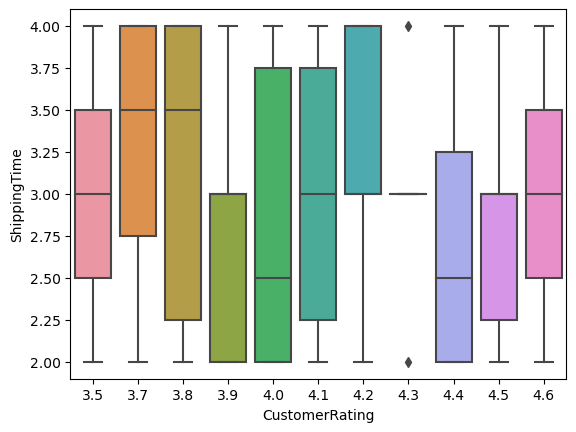

In [44]:
# Using a boxplot to check the corelation between "CustomerRating" and "ShippingTime                                                                               "
sns.boxplot(data["CustomerRating"], data["ShippingTime"])

*Note:  Identify variations, outliers, and the overall spread of numerical values within distinct categorical groups.*

## 3. Distplot 

-- Purpose: Compare distributions of numerical variables across categories.

-- Usage: `sns.distplot(data['NumericalColumn'], hue=data['CategoricalColumn'], kde=False)`

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `k

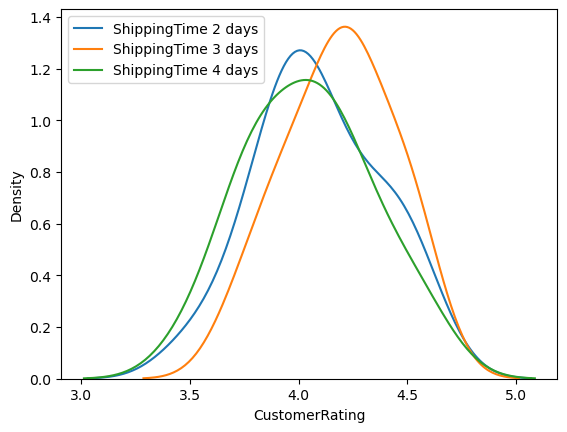

In [52]:
# Using a distplot to check the compare between "ShippingTime" and "CustomerRating"

sns.distplot(data[data["ShippingTime"] == 2]["CustomerRating"],hist=False, label="ShippingTime 2 days")
sns.distplot(data[data["ShippingTime"] == 3]["CustomerRating"],hist=False, label="ShippingTime 3 days")
sns.distplot(data[data["ShippingTime"] == 4]["CustomerRating"],hist=False, label="ShippingTime 4 days")
# Adding legend
plt.legend()
xlabel='CustomerRating', 
ylabel='Density'
# Display the plot
plt.show()

*Note: This variation helps in exploring how the distribution of numerical values varies among different groups or classes defined by a categorical variable.*

## *III. Visualizing (Categorical - Categorical) Columns*

## 1. HeatMap 

-- Purpose: Display correlation coefficients between numerical variables.

-- Usage: `sns.heatmap(data.corr(), annot=True)`

In [64]:
pd.crosstab(tips_data['sex'],tips_data['smoker'])	

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


<AxesSubplot:xlabel='smoker', ylabel='sex'>

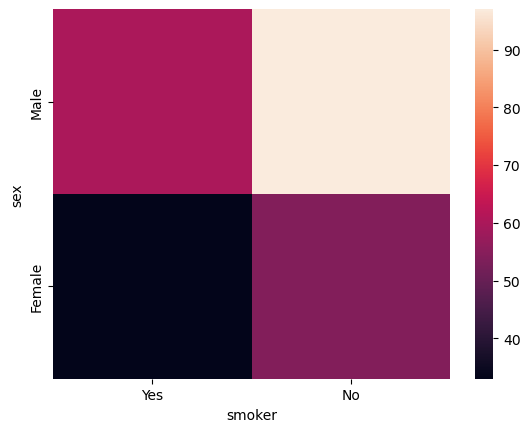

In [65]:
# Using a heat map to check the correlation between "sex" and "smoker"
sns.heatmap(pd.crosstab(tips_data['sex'],tips_data['smoker']))

*Note: It that shows the magnitude of the phenomenon as colour in two dimensions. The values of correlation can vary from -1 to 1 where -1 means strong negative and +1 means strong positive correlation.*

In [67]:
(tips_data.groupby('sex').mean()['size']*100)

sex
Male      263.057325
Female    245.977011
Name: size, dtype: float64

## 2. ClusterMap 

-- Purpose: Visualize clusters in dataset (especially hierarchical clustering).

-- Usage: `sns.clusterplot(data)`

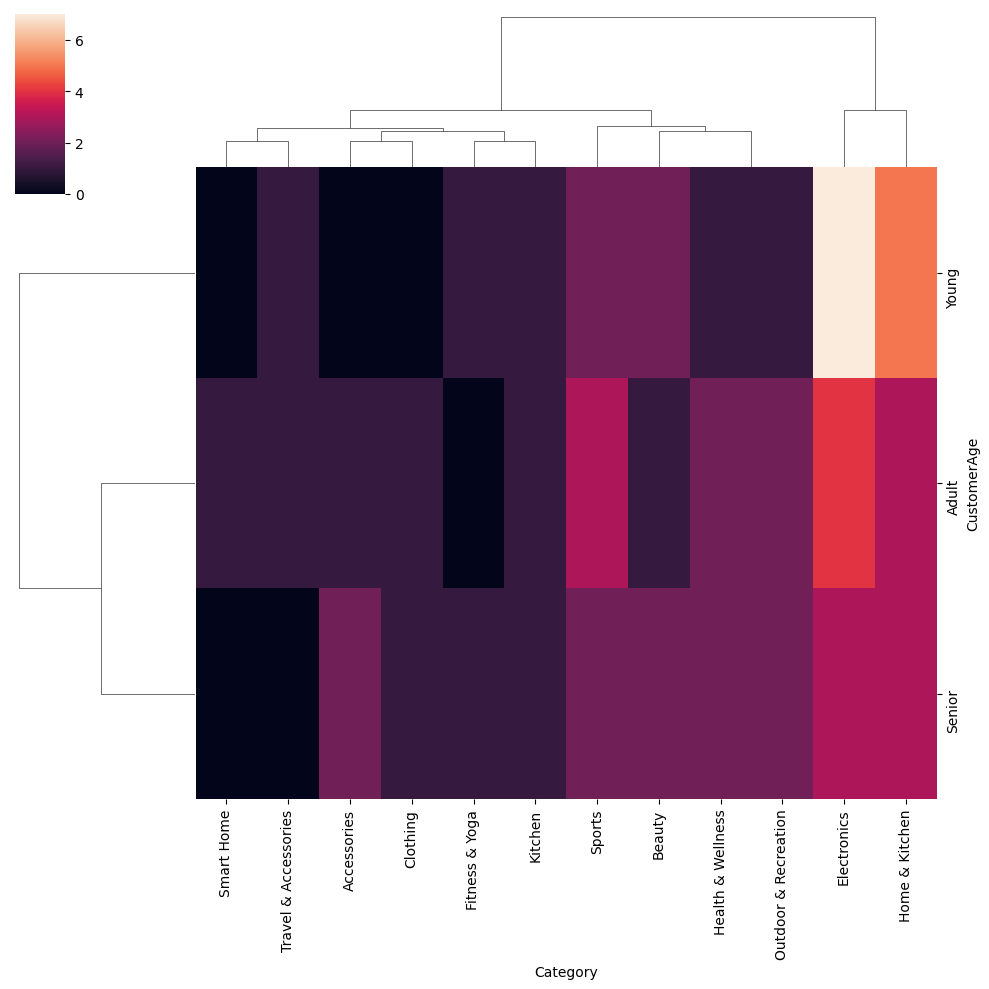

In [69]:
# Using a cluster map to check the correlation between "CustomerAge" and "Category"
sns.clustermap(pd.crosstab(data['CustomerAge'],data['Category']))

*Note: Clusterplot is employed in clustering analysis, where data points are grouped based on their similarities. The plot assists in understanding the structure of clusters and relationships between data points.*

## *IV. Visualizing All the Numerical Columns - Only*

## 1. Pairplot

-- Purpose: Visualize pairwise relationships in a dataset.

-- Usage: sns.pairplot(data)

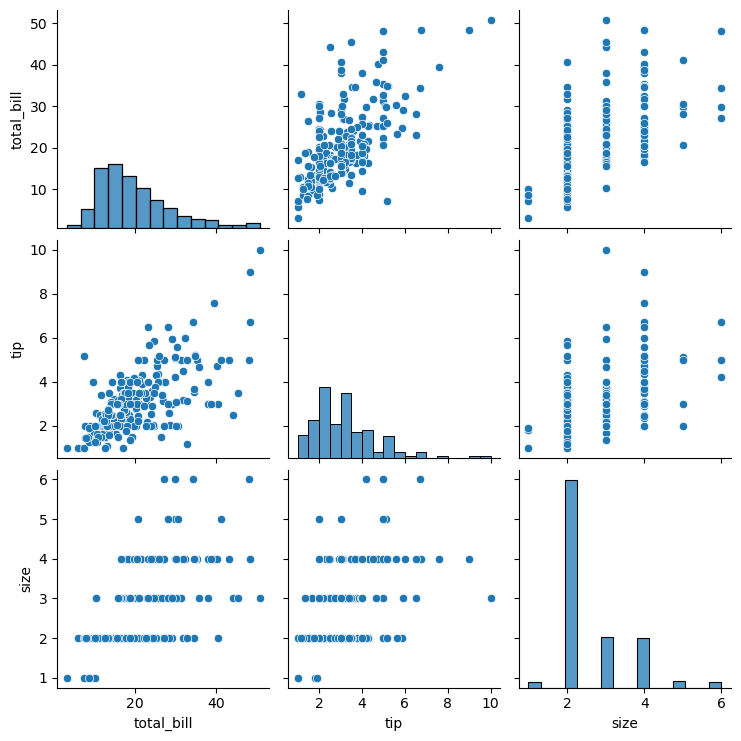

In [71]:
# Using pairplot to plot the pairwise relationship btw each numerical columns present in the dataframe
sns.pairplot(tips_data)

*Note: The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.*

Key components of Exploratory Data Analysis include:

* `Data Summarization`: Describing the main characteristics of the data, such as central tendency, variability, and distribution.

* `Data Visualization`: Creating visual representations of the data to better understand its structure and identify patterns or trends.

* `Data Cleaning`: Identifying and handling missing or inconsistent data to ensure the accuracy of the analysis.

* `Statistical Analysis`: Using statistical methods to explore relationships between variables and test hypotheses.

* `Pattern Recognition`: Identifying outliers, clusters, or any unusual patterns in the data.

* `Hypothesis Generation`: Formulating initial hypotheses or questions about the data based on observed patterns.


*Note: The dataset named as "data" utilized in this context is a synthetic toy dataset generated by ChatGPT solely for the purpose of visualization demonstration. Consequently, I refrain from providing comment on the insights derived from each graph.*